In [1]:
import pandas as pd
import json
import numpy as np
import requests
import urllib

In [2]:
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.validation import make_valid
#from shapely.ops import unary_union

geojson

In [3]:
gdf = gpd.read_file("/Users/mio/Documents/GitHub/aging-society/capacity_map/municipalities_simplified.json")

In [4]:
gdf = gdf.rename(columns={'N03_007':'code'})

In [5]:
#exclude prefectures
prefs = gdf.iloc[:47]
gdf = gdf.iloc[47:].copy()

In [6]:
#dissolve
gdf['geometry'] = gdf['geometry'].apply(make_valid)
gdf_dissolved = gdf.dissolve('code').reset_index()

In [7]:
gdf_dissolved[gdf_dissolved.duplicated(subset=['code'])]

,code,geometry,N03_001,N03_002,N03_003,N03_004


In [8]:
gdf_dissolved.head()

,code,geometry,N03_001,N03_002,N03_003,N03_004
0,01101,"POLYGON ((141.35520 43.06859, 141.34326 43.066...",北海道,石狩振興局,札幌市,中央区
1,01102,"POLYGON ((141.43880 43.16178, 141.43380 43.169...",北海道,石狩振興局,札幌市,北区
2,01103,"POLYGON ((141.45726 43.09342, 141.44439 43.101...",北海道,石狩振興局,札幌市,東区
3,01104,"POLYGON ((141.47346 43.09612, 141.45726 43.093...",北海道,石狩振興局,札幌市,白石区
4,01105,"POLYGON ((141.43407 43.02609, 141.39468 43.041...",北海道,石狩振興局,札幌市,豊平区


In [9]:
len(gdf_dissolved)

1902

capacity data

In [10]:
# Opening JSON file
f = open("/Users/mio/Documents/GitHub/aging-society/data/facility_data_ver2.json")
data = json.loads(f.read())

In [11]:
df = pd.json_normalize(data['cities'])

In [12]:
len(df)

1896

In [13]:
#kuril
gdf_dissolved[gdf_dissolved.code.isin(set(df.code)^set(gdf_dissolved.code))]

,code,geometry,N03_001,N03_002,N03_003,N03_004
188,01695,"MULTIPOLYGON (((146.64643 43.70152, 146.64737 ...",北海道,根室振興局,色丹郡,色丹村
189,01696,"MULTIPOLYGON (((145.43835 43.72038, 145.44470 ...",北海道,根室振興局,国後郡,泊村
190,01697,"MULTIPOLYGON (((145.74475 44.07173, 145.74375 ...",北海道,根室振興局,国後郡,留夜別村
191,01698,"MULTIPOLYGON (((146.98436 44.44291, 146.98336 ...",北海道,根室振興局,択捉郡,留別村
192,01699,"MULTIPOLYGON (((147.92096 44.96840, 147.92051 ...",北海道,根室振興局,紗那郡,紗那村
193,01700,"MULTIPOLYGON (((148.37695 45.22652, 148.37692 ...",北海道,根室振興局,蘂取郡,蘂取村


In [14]:
gdf_dissolved = gdf_dissolved[gdf_dissolved.code.isin(set(df.code))]

In [15]:
gdf_dissolved

,code,geometry,N03_001,N03_002,N03_003,N03_004
0,01101,"POLYGON ((141.35520 43.06859, 141.34326 43.066...",北海道,石狩振興局,札幌市,中央区
1,01102,"POLYGON ((141.43880 43.16178, 141.43380 43.169...",北海道,石狩振興局,札幌市,北区
2,01103,"POLYGON ((141.45726 43.09342, 141.44439 43.101...",北海道,石狩振興局,札幌市,東区
3,01104,"POLYGON ((141.47346 43.09612, 141.45726 43.093...",北海道,石狩振興局,札幌市,白石区
4,01105,"POLYGON ((141.43407 43.02609, 141.39468 43.041...",北海道,石狩振興局,札幌市,豊平区
...,...,...,...,...,...,...
1897,47361,"MULTIPOLYGON (((126.79599 26.29639, 126.79541 ...",沖縄県,None,島尻郡,久米島町
1898,47362,"MULTIPOLYGON (((127.73361 26.09843, 127.73361 ...",沖縄県,None,島尻郡,八重瀬町
1899,47375,"MULTIPOLYGON (((124.68558 24.63847, 124.68564 ...",沖縄県,None,宮古郡,多良間村
1900,47381,"MULTIPOLYGON (((123.55436 24.19216, 123.55442 ...",沖縄県,None,八重山郡,竹富町


In [16]:
df.columns

Index(['code', 'population.age40_64.2020', 'population.age40_64.2025',
       'population.age40_64.2030', 'population.age40_64.2035',
       'population.age40_64.2040', 'population.age40_64.2045',
       'population.over65.2020', 'population.over65.2025',
       'population.over65.2030', 'population.over65.2035',
       'population.over65.2040', 'population.over65.2045',
       'population.over75.2020', 'population.over75.2025',
       'population.over75.2030', 'population.over75.2035',
       'population.over75.2040', 'population.over75.2045',
       'population.demand.2020', 'population.demand.2025',
       'population.demand.2030', 'population.demand.2035',
       'population.demand.2040', 'population.demand.2045',
       'facilities.number.total', 'facilities.number.home-visit',
       'facilities.number.daycare', 'facilities.number.residential-care',
       'facilities.number.specified', 'facilities.number.home-care-support',
       'facilities.number.assistive-products', 'facilit

In [17]:
df['cap_2020k'] = round(df['capacity.residential-care.number'] / df['population.over75.2020'] *1000, 2)
df['cap_2045k'] = round(df['capacity.residential-care.number'] / df['population.over75.2045'] *1000, 2)

In [18]:
df.loc[df['population.over75.2045']==0]

,code,population.age40_64.2020,population.age40_64.2025,population.age40_64.2030,population.age40_64.2035,population.age40_64.2040,population.age40_64.2045,population.over65.2020,population.over65.2025,population.over65.2030,...,facilities.per_over75.home-care-support,facilities.per_over75.assistive-products,capacity.residential-care.number,capacity.residential-care.per_over75,capacity.specified.number,capacity.specified.per_over75,care_workers.number,care_workers.per_over75,cap_2020k,cap_2045k
411,07543,950,0,0,0,0,0,482,0,0,...,12.88,0.00,0,0,0,0,27.57,118.33,0.00,NaN
413,07545,435,0,0,0,0,0,87,0,0,...,0.00,58.82,27,79412,0,0,22.50,661.76,794.12,inf
414,07546,0,0,0,0,0,0,0,0,0,...,0.00,0.00,9,0,0,0,13.70,0.00,inf,inf
415,07547,781,0,0,0,0,0,568,0,0,...,16.53,8.26,18,7438,0,0,59.55,246.07,74.38,inf


In [19]:
gdf_merged = gdf_dissolved.merge(df, on='code')
gdf_merged = gdf_merged.replace(np.inf, np.nan)

In [20]:
gdf_merged.cap_2020k = gdf_merged.cap_2020k.clip(upper=200)
gdf_merged.cap_2045k = gdf_merged.cap_2045k.clip(upper=200)

In [21]:
gdf_merged.to_file("./capacity_map/capacity_map_clipped.geojson", driver="GeoJSON")

In [22]:
gdf_merged2 = gdf_merged.to_crs(epsg=6690)
gdf_merged2.crs

<Derived Projected CRS: EPSG:6690>
Name: JGD2011 / UTM zone 53N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Japan - between 132°E and 138°E, onshore and offshore.
- bounds: (132.0, 17.09, 138.0, 43.55)
Coordinate Operation:
- name: UTM zone 53N
- method: Transverse Mercator
Datum: Japanese Geodetic Datum 2011
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
gdf_merged2.to_file("./capacity_map/capacity_map_clipped2.geojson", driver="GeoJSON")

In [24]:
gdf_merged.cap_2020k.describe()

count    1895.000000
mean       82.847451
std        36.005768
min         0.000000
25%        61.345000
50%        77.940000
75%        99.000000
max       200.000000
Name: cap_2020k, dtype: float64

In [25]:
gdf_merged.cap_2045k.describe()

count    1892.000000
mean       82.495724
std        45.881129
min         0.000000
25%        49.115000
50%        72.850000
75%       107.627500
max       200.000000
Name: cap_2045k, dtype: float64

locations of facilities in major cities

In [26]:
def get_coordinate(x):
    try:
        s_quote = urllib.parse.quote(x)
        url = f"https://msearch.gsi.go.jp/address-search/AddressSearch?q={s_quote}" 
        response = requests.get(url)
        coordinate = response.json()[0]["geometry"]["coordinates"]
    except:
        coordinate = np.nan
    return coordinate

In [27]:
major_codes = gdf_dissolved[gdf_dissolved.N03_001.isin(['東京都','大阪府','愛知県','北海道'])].code

In [28]:
#1: residential
residential = pd.read_csv("/Users/mio/Documents/GitHub/aging-society/data/residential_care_facilities.csv", dtype={'code':str})
residential.head()

,type,name,address,capacity,code
0,介護老人保健施設,介護療養型老人保健施設宮の森,札幌市中央区宮の森1237番地1,136,01101
1,介護老人福祉施設,西円山敬樹園,札幌市中央区円山西町4丁目3番20号,123,01101
2,介護老人保健施設,介護老人保健施設けあ・ばんけい,札幌市中央区盤渓232番地7,100,01101
3,介護老人保健施設,慈啓会老人保健施設,札幌市中央区旭ヶ丘5丁目6-48,90,01101
4,介護老人保健施設,老人保健施設 えん,札幌市中央区宮の森１２３８番地１,85,01101


In [29]:
major_residential = residential.loc[residential.code.isin(major_codes)].copy()
major_residential['coordinate'] = major_residential.address.apply(get_coordinate)
major_residential['residential'] = 1

In [32]:
#2: specified facilities
specified = pd.read_csv("/Users/mio/Documents/GitHub/aging-society/data/specified_facilities.csv", dtype={'code':str})
specified.head()

,type,name,address,capacity,code
0,有料老人ホーム,介護付有料老人ホーム ヴィラフローラ南円山,札幌市中央区南8条西26丁目1-1,158,01101
1,有料老人ホーム,アイムス旭山公園,札幌市中央区双子山4丁目3番8号,150,01101
2,有料老人ホーム,シルバーハイツ中島公園,札幌市中央区南9条西6丁目1番36-2号,114,01101
3,有料老人ホーム,そんぽの家苗穂,札幌市中央区北二条東十三丁目1番2号,104,01101
4,軽費老人ホーム,特定施設入居者生活介護 カームヒル西円山,札幌市中央区円山西町４丁目３番２１号,100,01101


In [33]:
major_specified = specified.loc[specified.code.isin(major_codes)].copy()
major_specified['coordinate'] = major_specified.address.apply(get_coordinate)
major_specified['residential'] = 0

In [38]:
#merge
major_facilities = pd.concat([major_residential, major_specified], ignore_index=True)

major_facilities = major_facilities[major_facilities.capacity>0]
major_facilities['demand'] = major_facilities.code.map(df.set_index('code')['population.demand.2020'].to_dict())
major_facilities['capacity_per_k'] = major_facilities.capacity / major_facilities.demand *1000

major_facilities['longitude'] = major_facilities.coordinate.apply(lambda x: x[0])
major_facilities['latitude'] = major_facilities.coordinate.apply(lambda x: x[1])

In [50]:
major_facilities[major_facilities.coordinate.isna()]

,type,name,address,capacity,code,coordinate,residential,demand,capacity_pct


In [54]:
major_facilities.capacity_per_k.describe()

count    7515.000000
mean        5.114829
std        14.155383
min         0.011967
25%         0.725674
50%         1.604752
75%         4.133415
max       326.640991
Name: capacity_per_k, dtype: float64

<AxesSubplot:>

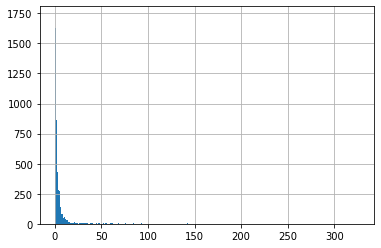

In [58]:
major_facilities.capacity_per_k.hist(bins=500)

In [60]:
major_facilities[major_facilities.residential==1]

,type,name,address,capacity,code,coordinate,residential,demand,capacity_pct,capacity_per_k
0,介護老人保健施設,介護療養型老人保健施設宮の森,札幌市中央区宮の森1237番地1,136,01101,"[141.291962, 43.056568]",1,28764.814,0.472800,4.727999
1,介護老人福祉施設,西円山敬樹園,札幌市中央区円山西町4丁目3番20号,123,01101,"[141.303238, 43.040909]",1,28764.814,0.427606,4.276058
2,介護老人保健施設,介護老人保健施設けあ・ばんけい,札幌市中央区盤渓232番地7,100,01101,"[141.273132, 43.03577]",1,28764.814,0.347647,3.476470
3,介護老人保健施設,慈啓会老人保健施設,札幌市中央区旭ヶ丘5丁目6-48,90,01101,"[141.322876, 43.037189]",1,28764.814,0.312882,3.128823
4,介護老人保健施設,老人保健施設 えん,札幌市中央区宮の森１２３８番地１,85,01101,"[141.287109, 43.044884]",1,28764.814,0.295500,2.954999
...,...,...,...,...,...,...,...,...,...,...
6976,介護老人福祉施設,特別養護老人ホーム菊水苑,河南町大字加納元南１７番地,80,27382,"[135.641891, 34.490402]",1,2552.659,3.133987,31.339870
6977,介護老人福祉施設,特別養護老人ホーム あんり,河南町大字寛弘寺１０１番地,80,27382,"[135.61911, 34.487762]",1,2552.659,3.133987,31.339870
6978,介護老人福祉施設（地域密着型）,地域密着型介護老人福祉施設 ゆうり,河南町大字神山２５９番１,29,27382,"[135.624969, 34.481827]",1,2552.659,1.136070,11.360703
6980,介護老人福祉施設,特別養護老人ホーム 千早赤阪春の家,千早赤阪村東阪122-1番地,68,27383,"[135.628235, 34.443336]",1,1110.422,6.123798,61.237980


In [74]:
major_facilities.to_csv('./data/facilities_in_major_cities.csv')

In [78]:
#data for MapBox usage
major_facilities.loc[major_facilities.residential==1,['code','capacity_per_k','longitude','latitude']].to_csv('./data/residencial_facilities_in_major_cities.csv')
major_facilities.loc[major_facilities.residential==0,['code','capacity_per_k','longitude','latitude']].to_csv('./data/specified_facilities_in_major_cities.csv')

additional areas

In [79]:
additional_codes = gdf_dissolved[gdf_dissolved.N03_001.isin(['千葉県','埼玉県','神奈川県','茨城県','岐阜県','滋賀県','三重県','京都府','奈良県','兵庫県','和歌山県'])].code

In [80]:
additional_residential = residential.loc[residential.code.isin(additional_codes)].copy()
additional_residential['coordinate'] = additional_residential.address.apply(get_coordinate)
additional_residential['residential'] = 1

In [81]:
additional_specified = specified.loc[specified.code.isin(additional_codes)].copy()
additional_specified['coordinate'] = additional_specified.address.apply(get_coordinate)
additional_specified['residential'] = 0

In [97]:
#merge
additional_facilities = pd.concat([additional_residential, additional_specified], ignore_index=True)

additional_facilities = additional_facilities[additional_facilities.capacity>0]
additional_facilities['demand'] = additional_facilities.code.map(df.set_index('code')['population.demand.2020'].to_dict())
additional_facilities['capacity_per_k'] = additional_facilities.capacity / additional_facilities.demand *1000

#additional_facilities['longitude'] = additional_facilities.coordinate.apply(lambda x: x[0])
#additional_facilities['latitude'] = additional_facilities.coordinate.apply(lambda x: x[1])

In [115]:
null_list = additional_facilities[additional_facilities.coordinate.apply(lambda x: type(x))!=list].address.to_list()

In [121]:
null_coordinate = {
    '京都市上京区小川通今出川下る西入東今町375番地': [135.7535269313705,35.029071098229494],
    '京都市中京区蛸薬師通油小路東入元本能寺南町３４６番地': [135.75414226833158,35.0059133440084],
    '京都市下京区油小路下魚棚通下る油小路町293番地': [135.75399038260775,34.988710407455514],
    '京都市下京区油小路通下魚棚下ル油小路町293番地': [135.75409254846812,34.98861658228423],
    '京都市伏見区醍醐下端山36': [135.81983898049506, 34.947915450978726],
    '京都市上京区今出川通大宮1丁東入ル北猪熊町295': [135.75083142467858, 35.03077992122478],
    '京都市中京区六角通室町西入玉蔵町129-1': [135.757630978335, 35.00760637336301]
}
null_coordinate

{'京都市上京区小川通今出川下る西入東今町375番地': [135.7535269313705, 35.029071098229494],
 '京都市中京区蛸薬師通油小路東入元本能寺南町３４６番地': [135.75414226833158, 35.0059133440084],
 '京都市下京区油小路下魚棚通下る油小路町293番地': [135.75399038260775, 34.988710407455514],
 '京都市下京区油小路通下魚棚下ル油小路町293番地': [135.75409254846812, 34.98861658228423],
 '京都市伏見区醍醐下端山36': [135.81983898049506, 34.947915450978726],
 '京都市上京区今出川通大宮1丁東入ル北猪熊町295': [135.75083142467858, 35.03077992122478],
 '京都市中京区六角通室町西入玉蔵町129-1': [135.757630978335, 35.00760637336301]}

In [127]:
additional_facilities.loc[additional_facilities.coordinate.apply(lambda x: type(x))!=list, 'coordinate'] =additional_facilities.loc[additional_facilities.coordinate.apply(lambda x: type(x))!=list, 'address'].map(null_coordinate)

In [128]:
additional_facilities['longitude'] = additional_facilities.coordinate.apply(lambda x: x[0])
additional_facilities['latitude'] = additional_facilities.coordinate.apply(lambda x: x[1])

In [129]:
additional_facilities

,type,name,address,capacity,code,coordinate,residential,demand,capacity_per_k,longitude,latitude
0,介護老人保健施設,介護老人保健施設こすもぴあ,水戸市石川４－４０２７,100,08201,"[140.4245, 36.389862]",1,36426.240,2.745274,140.424500,36.389862
1,介護老人保健施設,介護老人保健施設 みがわ,水戸市見川町2131-105,100,08201,"[140.421387, 36.360958]",1,36426.240,2.745274,140.421387,36.360958
2,介護老人保健施設,介護老人保健施設はぁもにか,水戸市石川４－４０３９－２６,100,08201,"[140.423843, 36.391323]",1,36426.240,2.745274,140.423843,36.391323
3,介護老人保健施設,介護老人保健施設 はなみずき,水戸市東原3-2-8,100,08201,"[140.448242, 36.386539]",1,36426.240,2.745274,140.448242,36.386539
4,介護老人保健施設,介護老人保健施設 大串の里,水戸市大串町５８４番1,100,08201,"[140.542068, 36.332199]",1,36426.240,2.745274,140.542068,36.332199
...,...,...,...,...,...,...,...,...,...,...,...
11307,軽費老人ホーム,ケアハウス ヘリオス,広川町和田１８番地,30,30362,"[135.163605, 34.026272]",0,1191.857,25.170805,135.163605,34.026272
11308,軽費老人ホーム,軽費老人ホームケアハウス博愛みちしお,日高町阿尾646,50,30382,"[135.068344, 33.89312]",0,1214.253,41.177580,135.068344,33.893120
11309,有料老人ホーム,サービス付き高齢者向け住宅 辻の郷,みなべ町東吉田282,30,30391,"[135.326645, 33.775551]",0,2015.813,14.882333,135.326645,33.775551
11310,サ高住,特定施設サービス付き高齢者向け住宅辻の郷,みなべ町東吉田282,30,30391,"[135.326645, 33.775551]",0,2015.813,14.882333,135.326645,33.775551


In [130]:
facilities_list = pd.concat([major_facilities, additional_facilities])
facilities_list.to_csv('./data/facilities_list.csv', index=False)

In [131]:
#data for MapBox usage
facilities_list.loc[facilities_list.residential==1,['code','capacity_per_k','longitude','latitude']].to_csv('./data/facilities_list_residential.csv', index=False)
facilities_list.loc[facilities_list.residential==0,['code','capacity_per_k','longitude','latitude']].to_csv('./data/facilities_list_specified.csv',index=False)